# Estimation using Confidence Interval 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
baby = pd.read_csv('data/baby.csv')
baby.head()

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False


In [4]:
birth_weight_rate = pd.DataFrame({'Ratio of BW:GD': baby['Birth Weight'] / baby['Gestational Days']})
birth_weight_rate.head()

,Ratio of BW:GD
0,0.422535
1,0.400709
2,0.458781
3,0.382979
4,0.475524


In [5]:
median = np.percentile(birth_weight_rate['Ratio of BW:GD'], 50)
median

np.float64(0.42907801418439717)

In [35]:
sample_size = 500
sample1 = birth_weight_rate.sample(sample_size, replace=True)
sample1.head()

,Ratio of BW:GD
786,0.475352
333,0.419580
183,0.470790
96,0.435897
274,0.404762


In [36]:
sample_median = np.percentile(sample1['Ratio of BW:GD'], 50)
sample_median

np.float64(0.4298318796612312)

In [38]:
def one_expt():
    sample = sample1.sample(500, replace=True)
    sample_median = np.percentile(sample['Ratio of BW:GD'], 50)
    return sample_median

In [69]:
repetitions = 10000
total_outcomes = []

for x in np.arange(repetitions):
    sample_median = one_expt()
    total_outcomes.append(sample_median)

total_outcomes = np.array(total_outcomes)

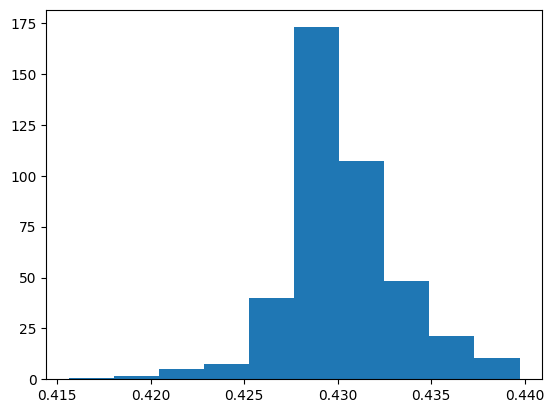

In [70]:
plt.hist(total_outcomes, density=True)
plt.show()

In [71]:
left_margin = np.percentile(total_outcomes, 2.5)
right_margin = np.percentile(total_outcomes, 97.5)

In [72]:
left_margin, right_margin

(np.float64(0.42419578913837463), np.float64(0.43738803116004754))

In [ ]:
I am 95% confident that the median of the birth weight rate of teh children is in the range of 
[0.424195, 0.437388]